# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [2]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [ ]:
minValue = 1
maxValue = 6
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

In [ ]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [ ]:
results

In [ ]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [ ]:
averageLength = 174.25
stdLength = 8
numberOfPeopleToSample = 3 # Play with these values to show the impact on the histogram

In [ ]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [ ]:
randomLengths

In [ ]:
randomLengths.plot(kind='hist', bins=10)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [ ]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [ ]:
sampleMeans

In [ ]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [ ]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

In [ ]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [ ]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

In [ ]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

In [63]:
imdb = pd.read_csv('..\imdb-data-2006-2016\IMDB-Movie-Data.csv')
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#### Negative skewness wide dispersion

<AxesSubplot:ylabel='Frequency'>

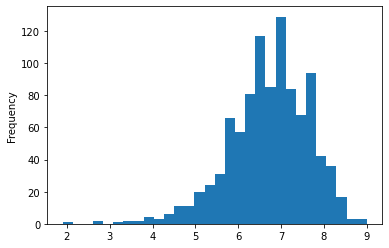

In [65]:
imdb['Rating'].plot(kind='hist', bins=30)

#### Exponential distribution

<AxesSubplot:ylabel='Frequency'>

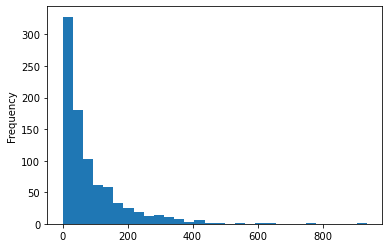

In [64]:
imdb['Revenue (Millions)'].dropna().plot(kind='hist', bins=30)

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)